<a href="https://colab.research.google.com/github/dhanasekar333/Covid_19-Prediction/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

In [55]:
data = pd.read_csv(r"/content/covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [56]:
data.describe()

,Sno,Cured,Confirmed
count,1446.000000,1446.000000,1446.000000
mean,723.500000,46.941909,275.855463
std,417.568557,139.876142,758.945831
min,1.000000,0.000000,0.000000
25%,362.250000,0.000000,4.000000
50%,723.500000,3.000000,26.000000
75%,1084.750000,23.750000,178.500000
max,1446.000000,1388.000000,9318.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1446 non-null   int64 
 1   Date                      1446 non-null   object
 2   Time                      1446 non-null   object
 3   State/UnionTerritory      1446 non-null   object
 4   ConfirmedIndianNational   1446 non-null   object
 5   ConfirmedForeignNational  1446 non-null   object
 6   Cured                     1446 non-null   int64 
 7   Deaths                    1446 non-null   object
 8   Confirmed                 1446 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 101.8+ KB


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1446 non-null   int64 
 1   Date                      1446 non-null   object
 2   Time                      1446 non-null   object
 3   State/UnionTerritory      1446 non-null   object
 4   ConfirmedIndianNational   1446 non-null   object
 5   ConfirmedForeignNational  1446 non-null   object
 6   Cured                     1446 non-null   int64 
 7   Deaths                    1446 non-null   object
 8   Confirmed                 1446 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 101.8+ KB


In [58]:
data.isna().sum()

,0
Sno,0
Date,0
Time,0
State/UnionTerritory,0
ConfirmedIndianNational,0
ConfirmedForeignNational,0
Cured,0
Deaths,0
Confirmed,0


In [64]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [66]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['DayofWeek']=data['Date'].dt.dayofweek
data['Weekend']= data['DayofWeek'].apply(lambda x:1 if x>=5 else 0)
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M %p')
data['Hour']= data['Time'].dt.hour

In [68]:
data.drop(['Date'], axis=1, inplace=True)

In [72]:
data = pd.get_dummies(data, columns=['State/UnionTerritory'],drop_first=True,dtype=int)


In [79]:
# Replace '-' with 0 in the entire DataFrame
data.replace('-', 0, inplace=True)

# If needed, convert affected columns to numeric (since '-' might've made them object type)
cols_to_fix = ['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed']
for col in cols_to_fix:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)


In [81]:
print(data.dtypes)


Sno                                                int64
Time                                      datetime64[ns]
ConfirmedIndianNational                            int64
ConfirmedForeignNational                           int64
Cured                                              int64
Deaths                                           float64
Confirmed                                          int64
Day                                                int32
Month                                              int32
Year                                               int32
DayofWeek                                          int32
Weekend                                            int64
Hour                                               int32
State/UnionTerritory_Andhra Pradesh                int64
State/UnionTerritory_Arunachal Pradesh             int64
State/UnionTerritory_Assam                         int64
State/UnionTerritory_Bihar                         int64
State/UnionTerritory_Chandigarh

In [82]:
X = data.drop(['Confirmed'], axis=1)
y = data['Confirmed']


In [89]:
X = X.drop('Time', axis=1)


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [93]:
y_pred = model.predict(X_test)

In [94]:
y_pred

array([4.03300e+01, 8.42000e+00, 8.51500e+01, 2.25000e+00, 1.83972e+03,
       7.00000e+00, 1.36300e+01, 3.75600e+01, 2.29000e+01, 5.54000e+00,
       1.03000e+00, 1.04333e+03, 1.02200e+01, 1.00000e+00, 3.47300e+01,
       1.41830e+03, 1.00900e+01, 1.82800e+01, 3.66130e+02, 2.28644e+03,
       1.29000e+01, 3.06000e+00, 6.11000e+00, 8.68370e+02, 1.88600e+01,
       1.40800e+01, 2.69000e+01, 3.10100e+01, 3.21000e+00, 2.19000e+01,
       3.34000e+00, 1.03000e+00, 1.12000e+01, 7.00000e+00, 1.47490e+02,
       7.70700e+01, 1.66000e+00, 4.10340e+02, 2.52900e+01, 3.00000e+00,
       1.02000e+00, 5.42290e+02, 1.11750e+02, 2.89500e+01, 1.01000e+00,
       2.13000e+00, 1.66000e+00, 1.89170e+02, 4.76100e+01, 1.01000e+00,
       1.74096e+03, 2.05400e+01, 9.59890e+02, 1.44900e+01, 6.65210e+02,
       1.41300e+01, 2.49720e+02, 1.09174e+03, 1.12230e+02, 6.80000e+00,
       1.00000e+00, 3.33700e+02, 1.33680e+02, 3.10000e+00, 6.75680e+02,
       1.53818e+03, 1.17500e+01, 1.50200e+01, 2.06000e+00, 7.398

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)




In [98]:
mae

31.204696132596688

In [99]:
mse

17098.68610165746

In [101]:
rmse

np.float64(130.76194439383906)

In [100]:
r2

0.9485403881058044

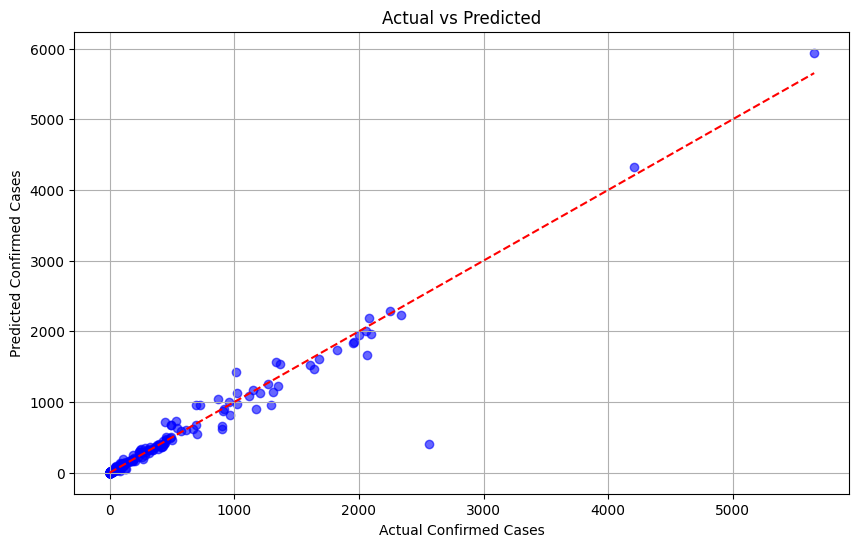

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


In [112]:
# Example input dictionary for testing
test_data = {
    'Sno': 10000,
    'Time': pd.to_datetime('2020-05-01'),
    'State/UnionTerritory': 'Tamil Nadu',
    'Cured': 16000,
    'Deaths': 200
}

# Convert to DataFrame
test_input = pd.DataFrame([test_data])

# One-hot encode 'State/UnionTerritory' like training
test_input_encoded = pd.get_dummies(test_input, columns=['State/UnionTerritory'])

# Add missing columns from training (model.feature_names_in_)
for col in model.feature_names_in_:
    if col not in test_input_encoded.columns:
        test_input_encoded[col] = 0  # Fill missing columns with 0

# Reorder columns to match training data
test_input_encoded = test_input_encoded[model.feature_names_in_]

# Predict
predicted_confirmed = model.predict(test_input_encoded)
print("Predicted Confirmed Cases:", int(predicted_confirmed[0]))



Predicted Confirmed Cases: 4179
